In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2
import os
import seaborn as sns
import pandas as pd
from skimage.filters import sobel
from skimage.feature import greycomatrix, greycoprops
from skimage.measure import shannon_entropy
from sklearn.tree import DecisionTreeClassifier

In [3]:
print(os.listdir(r"C:\Users\tejal\Desktop\Tejal Salunke\college\CV\CV project\dataset"))


['train', 'val']


In [4]:
#Start by creating empty lists.
train_images = []
train_labels = [] 

In [5]:
for directory_path in glob.glob(r"C:\Users\tejal\Desktop\Tejal Salunke\college\CV\CV project\dataset\train\*"):
    label = directory_path.split("\\")[-1]
    
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        
        img = cv2.imread(img_path, 0) #Reading color images
        img = cv2.resize(img, (128,128)) #Resize images
        train_images.append(img)
        train_labels.append(label)

In [6]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [98]:
print(train_images)
print(train_labels)

[[[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]

 [[134 130 140 ... 176 180 169]
  [137 135 126 ... 182 180 173]
  [139 130 117 ... 182 170 176]
  ...
  [213 201 199 ... 172 125 144]
  [206 199 207 ... 174 131 146]
  [205 204 211 ... 172 142 144]]

 ...

 [[ 11   7   4 ... 177 161 183]
  [  3   2   8 ... 190 164 213]
  [  4   0   1 ... 187 181 131]
  ...
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]]

 [[152 153 142 ... 148 146 145]
  [149 153 148 ... 147 148 145]
  [151 154 145 ... 145 146 145]
  ...
  [ 19  17  18 ...  40  47  53]
  [ 26  15  14 ...  36  42  44]
  [ 96  29  14 ...  29  30  

In [7]:

test_images = []
test_labels = []

In [8]:
for directory_path in glob.glob(r"C:\Users\tejal\Desktop\Tejal Salunke\college\CV\CV project\dataset\val\*"):
    fruit_label = directory_path.split("\\")[-1]
    
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, 0)
        img = cv2.resize(img, (128,128))
        test_images.append(img)
        test_labels.append(fruit_label)

In [9]:
test_images = np.array(test_images)

test_labels = np.array(test_labels)


In [102]:
print(test_images)
print(test_labels)

[[[188 167 157 ... 168 168 167]
  [188 167 157 ... 155 154 153]
  [189 167 158 ... 143 142 140]
  ...
  [188 189 190 ... 163 165 166]
  [190 190 191 ... 175 179 176]
  [191 192 193 ... 184 190 186]]

 [[123 118 110 ... 192 192 194]
  [124 119 112 ... 193 195 198]
  [126 122 114 ... 195 196 198]
  ...
  [151 153 158 ... 205 203 202]
  [151 154 159 ... 205 203 202]
  [152 155 160 ... 205 203 202]]

 [[ 19   6  13 ...  13  15  19]
  [ 17  12   7 ...  19  19  19]
  [ 13  19   5 ...  12  17  18]
  ...
  [108 104  96 ...  41  41  41]
  [113 107  99 ...  40  40  34]
  [122 108 100 ...  40  35  19]]

 ...

 [[ 24  13  20 ... 194 194 194]
  [ 17  19  38 ... 200 198 201]
  [ 11  40  23 ... 206 207 197]
  ...
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]]

 [[106 111 115 ... 188 208 195]
  [106 111 115 ... 207 197 200]
  [106 111 115 ... 191 202 202]
  ...
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 2

In [10]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [11]:
#Split data into test and train datasets (already split but assigning to meaningful convention)
#If you only have one dataset then split here
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

In [12]:
def feature_extractor(dataset):
    image_dataset = pd.DataFrame()
    for image in range(dataset.shape[0]):  #iterate through each file 
        #print(image)
        
        df = pd.DataFrame()  #Temporary data frame to capture information for each loop.
        #Reset dataframe to blank after each loop.
        
        img = dataset[image, :,:]
    ################################################################
    #START ADDING DATA TO THE DATAFRAME
  
                
         #Full image
        #GLCM = greycomatrix(img, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4])
        GLCM = greycomatrix(img, [1], [0])       
        GLCM_Energy = greycoprops(GLCM, 'energy')[0]
        df['Energy'] = GLCM_Energy
        GLCM_corr = greycoprops(GLCM, 'correlation')[0]
        df['Corr'] = GLCM_corr       
        GLCM_diss = greycoprops(GLCM, 'dissimilarity')[0]
        df['Diss_sim'] = GLCM_diss       
        GLCM_hom = greycoprops(GLCM, 'homogeneity')[0]
        df['Homogen'] = GLCM_hom       
        GLCM_contr = greycoprops(GLCM, 'contrast')[0]
        df['Contrast'] = GLCM_contr


        GLCM2 = greycomatrix(img, [3], [0])       
        GLCM_Energy2 = greycoprops(GLCM2, 'energy')[0]
        df['Energy2'] = GLCM_Energy2
        GLCM_corr2 = greycoprops(GLCM2, 'correlation')[0]
        df['Corr2'] = GLCM_corr2       
        GLCM_diss2 = greycoprops(GLCM2, 'dissimilarity')[0]
        df['Diss_sim2'] = GLCM_diss2       
        GLCM_hom2 = greycoprops(GLCM2, 'homogeneity')[0]
        df['Homogen2'] = GLCM_hom2       
        GLCM_contr2 = greycoprops(GLCM2, 'contrast')[0]
        df['Contrast2'] = GLCM_contr2

        GLCM3 = greycomatrix(img, [5], [0])       
        GLCM_Energy3 = greycoprops(GLCM3, 'energy')[0]
        df['Energy3'] = GLCM_Energy3
        GLCM_corr3 = greycoprops(GLCM3, 'correlation')[0]
        df['Corr3'] = GLCM_corr3       
        GLCM_diss3 = greycoprops(GLCM3, 'dissimilarity')[0]
        df['Diss_sim3'] = GLCM_diss3       
        GLCM_hom3 = greycoprops(GLCM3, 'homogeneity')[0]
        df['Homogen3'] = GLCM_hom3       
        GLCM_contr3 = greycoprops(GLCM3, 'contrast')[0]
        df['Contrast3'] = GLCM_contr3

        GLCM4 = greycomatrix(img, [0], [np.pi/4])       
        GLCM_Energy4 = greycoprops(GLCM4, 'energy')[0]
        df['Energy4'] = GLCM_Energy4
        GLCM_corr4 = greycoprops(GLCM4, 'correlation')[0]
        df['Corr4'] = GLCM_corr4       
        GLCM_diss4 = greycoprops(GLCM4, 'dissimilarity')[0]
        df['Diss_sim4'] = GLCM_diss4       
        GLCM_hom4 = greycoprops(GLCM4, 'homogeneity')[0]
        df['Homogen4'] = GLCM_hom4       
        GLCM_contr4 = greycoprops(GLCM4, 'contrast')[0]
        df['Contrast4'] = GLCM_contr4
        
        GLCM5 = greycomatrix(img, [0], [np.pi/2])       
        GLCM_Energy5 = greycoprops(GLCM5, 'energy')[0]
        df['Energy5'] = GLCM_Energy5
        GLCM_corr5 = greycoprops(GLCM5, 'correlation')[0]
        df['Corr5'] = GLCM_corr5       
        GLCM_diss5 = greycoprops(GLCM5, 'dissimilarity')[0]
        df['Diss_sim5'] = GLCM_diss5       
        GLCM_hom5 = greycoprops(GLCM5, 'homogeneity')[0]
        df['Homogen5'] = GLCM_hom5       
        GLCM_contr5 = greycoprops(GLCM5, 'contrast')[0]
        df['Contrast5'] = GLCM_contr5
        
        #Add more filters as needed
        entropy = shannon_entropy(img)
        df['Entropy'] = entropy

        
        #Append features from current image to the dataset
        image_dataset = image_dataset.append(df)
        
    return image_dataset

# SVM

In [19]:
from sklearn.svm import SVC
svc = SVC()

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

In [20]:
print("OVA")
p = dict()
for i in kernels:
  SVM = SVC(kernel=i, decision_function_shape='ovr')
  SV = SVM.fit(x_train, y_train)
  y_pred1 = SV.predict(x_test)
  #Results
  p[i] = accuracy_score(y_test, y_pred1)*100
  print("SVM " + i +" Results")
  print("SVM  " + i +" Accuracy: ",accuracy_score(y_test, y_pred1)*100,"%")
  print("CM = \n",confusion_matrix(y_test, y_pred1))
  print("\n\n")

OVA


ValueError: Found array with dim 3. Estimator expected <= 2.

In [79]:
image_features = feature_extractor(x_train)
X_for_ML =image_features

In [80]:
import lightgbm as lgb
 #Class names for LGBM start at 0 so reassigning labels from 1,2,3,4 to 0,1,2,3,4
d_train = lgb.Dataset(X_for_ML, label=y_train)

In [81]:
lgbm_params = {'learning_rate':0.05, 'boosting_type':'dart',    
              'objective':'multiclass',
              'metric': 'multi_logloss',
              'num_leaves':100,
              'max_depth':10,
              'num_class':2}  #no.of unique values in the target class not inclusive of the end value

In [82]:
lgb_model = lgb.train(lgbm_params, d_train, 100) #50 iterations. Increase iterations for small learning rates

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001148 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4590
[LightGBM] [Info] Number of data points in the train set: 15138, number of used features: 18
[LightGBM] [Info] Start training from score -0.670677
[LightGBM] [Info] Start training from score -0.716134


In [83]:
#Predict on Test data
#Extract features from test data and reshape, just like training data
test_features = feature_extractor(x_test)
test_features = np.expand_dims(test_features, axis=0)
test_for_RF = np.reshape(test_features, (x_test.shape[0], -1))

#Predict on test
test_prediction = lgb_model.predict(test_for_RF)
test_prediction=np.argmax(test_prediction, axis=1)
#Inverse le transform to get original label back. 
test_prediction = le.inverse_transform(test_prediction)

In [84]:
#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, test_prediction))

Accuracy =  0.9756420878210439


<AxesSubplot:>

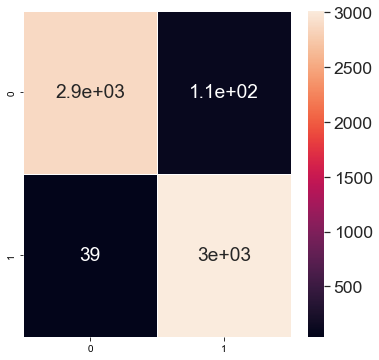

In [85]:
#Print confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, test_prediction)

fig, ax = plt.subplots(figsize=(6,6))         # Sample figsize in inches
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)

The prediction for this image is:  ['acne infantile']
The actual label for this image is:  acne infantile


C:\Users\tejal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


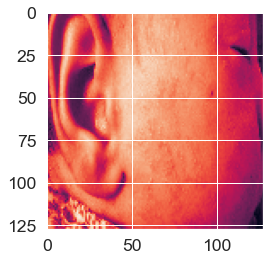

In [86]:
import random
n=random.randint(0, x_test.shape[0]-1) #Select the index of image to be loaded for testing
img = x_test[n]
plt.imshow(img)

#Extract features and reshape to right dimensions
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_features=feature_extractor(input_img)
input_img_features = np.expand_dims(input_img_features, axis=0)
input_img_for_RF = np.reshape(input_img_features, (input_img.shape[0], -1))
#Predict
img_prediction = lgb_model.predict(input_img_for_RF)
img_prediction=np.argmax(img_prediction, axis=1)
img_prediction = le.inverse_transform([img_prediction])  #Reverse the label encoder to original name
print("The prediction for this image is: ", img_prediction)
print("The actual label for this image is: ", test_labels[n])

The prediction for this image is:  ['acne vulgaris']
The actual label for this image is:  acne vulgaris


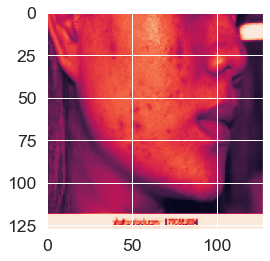

In [90]:
import random
n=random.randint(0, x_test.shape[0]-1) #Select the index of image to be loaded for testing
img = x_test[n]
plt.imshow(img)

#Extract features and reshape to right dimensions
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_features=feature_extractor(input_img)
input_img_features = np.expand_dims(input_img_features, axis=0)
input_img_for_RF = np.reshape(input_img_features, (input_img.shape[0], -1))
#Predict
img_prediction = lgb_model.predict(input_img_for_RF)
img_prediction=np.argmax(img_prediction, axis=1)
img_prediction = le.inverse_transform([img_prediction])  #Reverse the label encoder to original name
print("The prediction for this image is: ", img_prediction)
print("The actual label for this image is: ", test_labels[n])

In [27]:

from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
 
# X -> features, y -> label 
y = r"C:\Users\tejal\Desktop\Tejal Salunke\college\CV\CV project\dataset\val\*"
X = r"C:\Users\tejal\Desktop\Tejal Salunke\college\CV\CV project\dataset\train\*"
X = X.reshape(X.shape[1:])
X = X.transpose()

# dividing X, y into train and test data 
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 0) 


# print(type(X_train), type(y_train))
# print(type(X_test), type(y_test))

# training a linear SVM classifier 
from sklearn.svm import SVC 
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(x_train, y_train) 
svm_predictions = svm_model_linear.predict(x_test) 


# model accuracy for X_test 
accuracy = svm_model_linear.score(x_test, y_test) 

# creating a confusion matrix 
cm = confusion_matrix(y_test, svm_predictions) 
print(accuracy)
print(cm)

AttributeError: 'str' object has no attribute 'reshape'

In [30]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

In [31]:
print("OVA")
p = dict()
for i in kernels:
  SVM = SVC(kernel=i, decision_function_shape='ovr')
  SV = SVM.fit(x_train, y_train)
  y_pred1 = SV.predict(x_test)
  #Results
  p[i] = accuracy_score(y_test, y_pred1)*100
  print("SVM " + i +" Results")
  print("SVM  " + i +" Accuracy: ",accuracy_score(y_test, y_pred1)*100,"%")
  print("CM = \n",confusion_matrix(y_test, y_pred1))
  print("\n\n")

OVA


ValueError: Found array with dim 3. Estimator expected <= 2.